<a href="https://colab.research.google.com/github/RaushanAlpha23/Machine-Learning/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
df=pd.read_csv('/content/sample_data/diabetes[1].csv')

In [34]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
pipeline=Pipeline([
    ('scalar',StandardScaler()),
    ('model', LogisticRegression())
])

In [37]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('model', LogisticRegression())])

In [47]:
y_pred=pipeline.predict(x_test)
print(confusion_matrix(y_test, y_pred))

[[79 20]
 [18 37]]


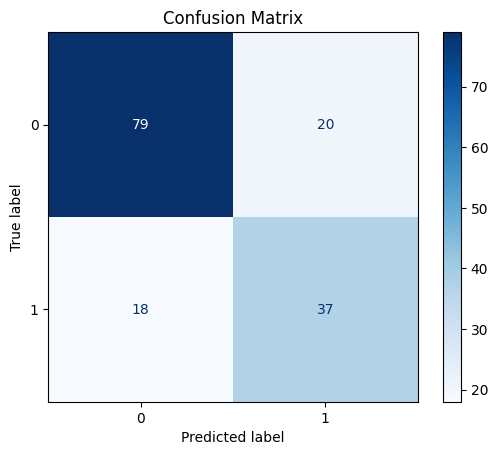

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Predict using the trained pipeline
y_pred = pipeline.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

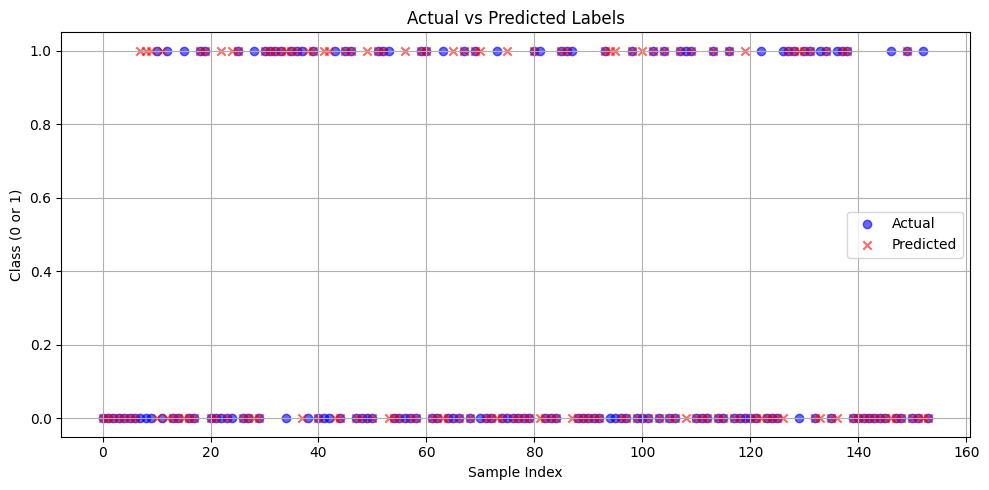

In [46]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x', alpha=0.6)
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Class (0 or 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()